In [1]:
import pandas as pd


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling.xlsx


In [3]:

df = pd.read_excel( 'Bank_Personal_Loan_Modelling.xlsx' , 'Data' )


In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df.shape

(5000, 14)

In [9]:
df.isnull()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [11]:
df.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

STEP-2:Check if you need to clean the data for any of the variables

In [12]:
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [13]:
df[df['Experience'] < 0]['Experience'].count()

52

In [14]:
#clean the negative variable
dfExp = df.loc[df['Experience'] >0]
negExp = df.Experience < 0
newlist = df.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [15]:
import numpy as np

In [16]:
#Get the value of Age and Education columns
#Filter the records which has positive experience and take the median
#Apply the median to the location which had negative experience

In [17]:
for id in newlist:
    age = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age)]
    exp = df_filtered['Experience'].median()
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = exp

In [18]:
df[df['Experience'] < 0]['Experience'].count()

0

In [19]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,4971.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.244015,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.357967,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**EDA:Study the data distribution in each attribute and target variable**

In [20]:
import seaborn as sns
df.nunique() #Number of unique in each column


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [21]:
df[df['Mortgage'] == 0]['Mortgage'].count() #Number of people with zero mortgage


3462

In [22]:
df[df['CCAvg'] == 0]['CCAvg'].count()


106

In [23]:
df.count()

ID                    5000
Age                   5000
Experience            4971
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [24]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [25]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [26]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [27]:
df.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [28]:
#Univariate analysis

In [29]:
import matplotlib.pyplot as plt

import seaborn as sns

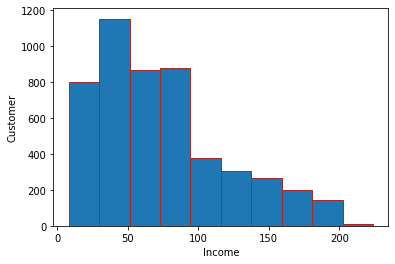

In [30]:
plt.hist(df.Income , edgecolor='Brown')
plt.xlabel('Income')
plt.ylabel('Customer')
plt.show()

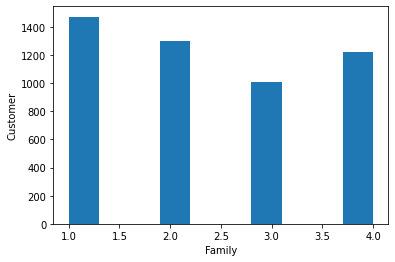

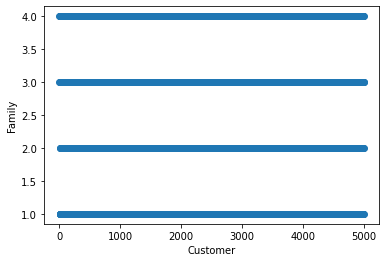

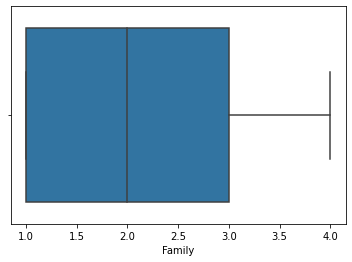

In [31]:
plt.hist(df.Family)
plt.xlabel('Family')
plt.ylabel('Customer')
plt.show()
plt.scatter(df.index,df['Family'])
plt.xlabel('Customer')
plt.ylabel('Family')
plt.show()
sns.boxplot(df['Family'])
plt.show()

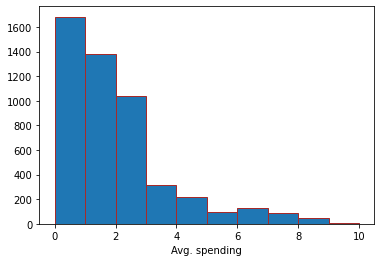

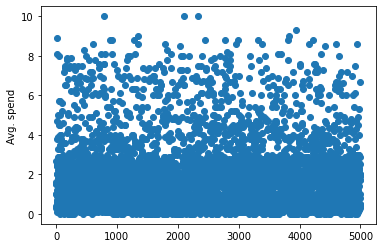

In [32]:
plt.hist(df['CCAvg'] , edgecolor='Brown')
plt.xlabel('Avg. spending')
plt.show()
plt.scatter(df.index,df['CCAvg'])
plt.ylabel('Avg. spend')
plt.show()

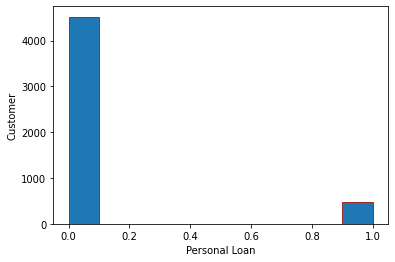

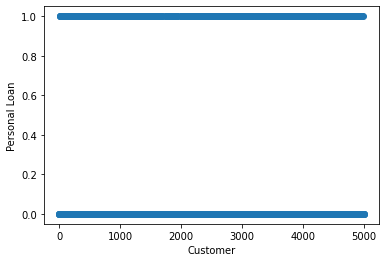

In [33]:
plt.hist(df['Personal Loan'], edgecolor='Brown')
plt.xlabel('Personal Loan')
plt.ylabel('Customer')
plt.show()
plt.scatter(df.index,df['Personal Loan'])
plt.xlabel('Customer')
plt.ylabel('Personal Loan')
plt.show()


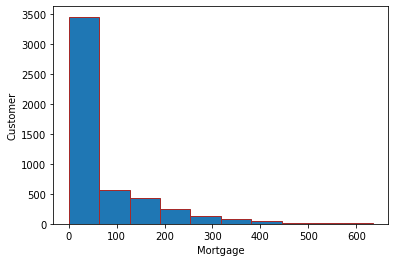

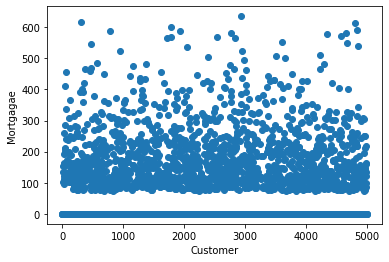

In [34]:
plt.hist(df.Mortgage, edgecolor='Brown')
plt.xlabel('Mortgage')
plt.ylabel('Customer')
plt.show()
plt.scatter(df.index,df['Mortgage'])
plt.xlabel('Customer')
plt.ylabel('Mortgagae')
plt.show()


In [35]:
# Bivariate Analysis

Text(0, 0.5, 'Income')

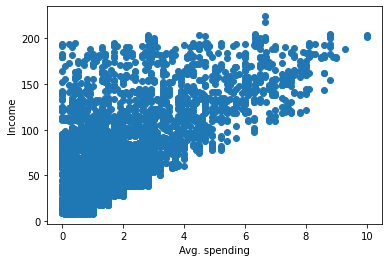

In [36]:
plt.scatter(df['CCAvg'],df['Income'])
plt.xlabel('Avg. spending')
plt.ylabel('Income')

Text(0, 0.5, 'Mortgage')

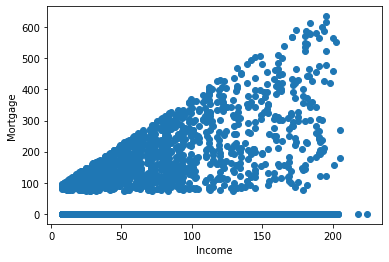

In [37]:
plt.scatter(df['Income'],df['Mortgage'])
plt.xlabel('Income')
plt.ylabel('Mortgage')

Text(0, 0.5, 'Mortgage')

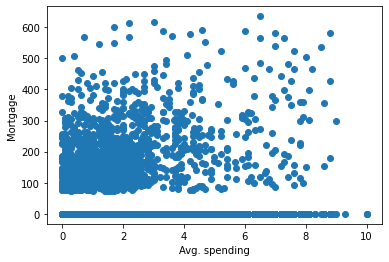

In [38]:
plt.scatter(df['CCAvg'],df['Mortgage'])
plt.xlabel('Avg. spending')
plt.ylabel('Mortgage')

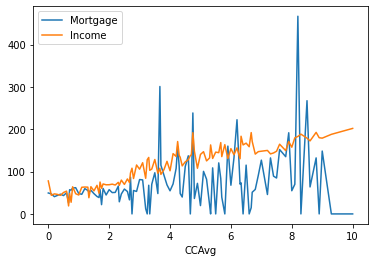

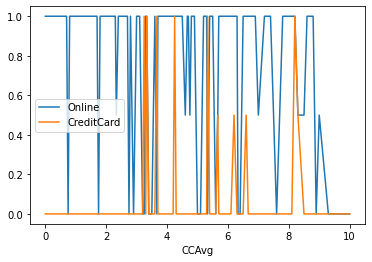

In [39]:
df_group = df.groupby('CCAvg').mean()[['Mortgage','Income']]
df_group.plot.line()
df_group2 = df.groupby('CCAvg').median()[['Online','CreditCard']]
df_group2.plot.line()

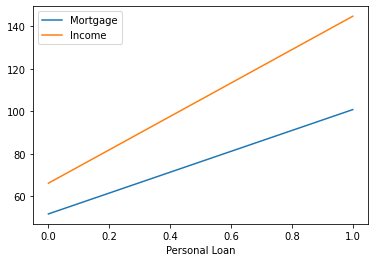

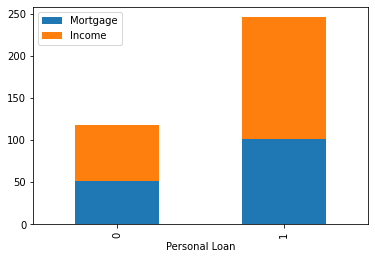

In [40]:
df_group3 = df.groupby('Personal Loan').mean()[['Mortgage','Income']]
df_group3.plot.line()
df_group3.plot.bar(stacked=True)

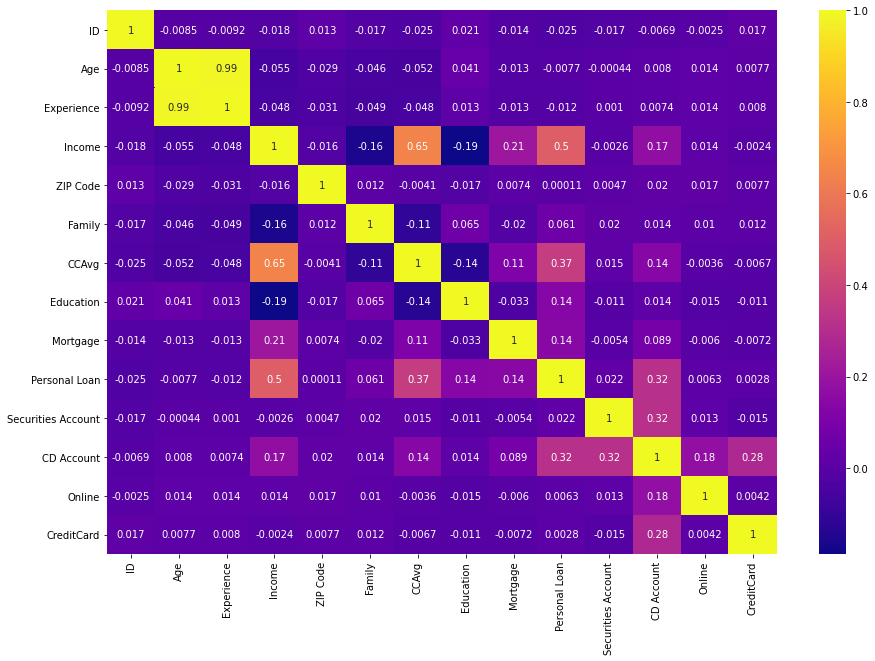

In [41]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr() , cmap='plasma' , annot=True)

**5. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively**

In [54]:
from sklearn.model_selection import train_test_split
target = 'Personal Loan'
df_x = df.drop(target,axis='columns',inplace=False)
df_y = df[target]

x_train,x_test,y_train,y_test = train_test_split(df_x, df_y,test_size=0.30,random_state=0,stratify=df_y)

**4 .Apply necessary transformations for the feature variables**

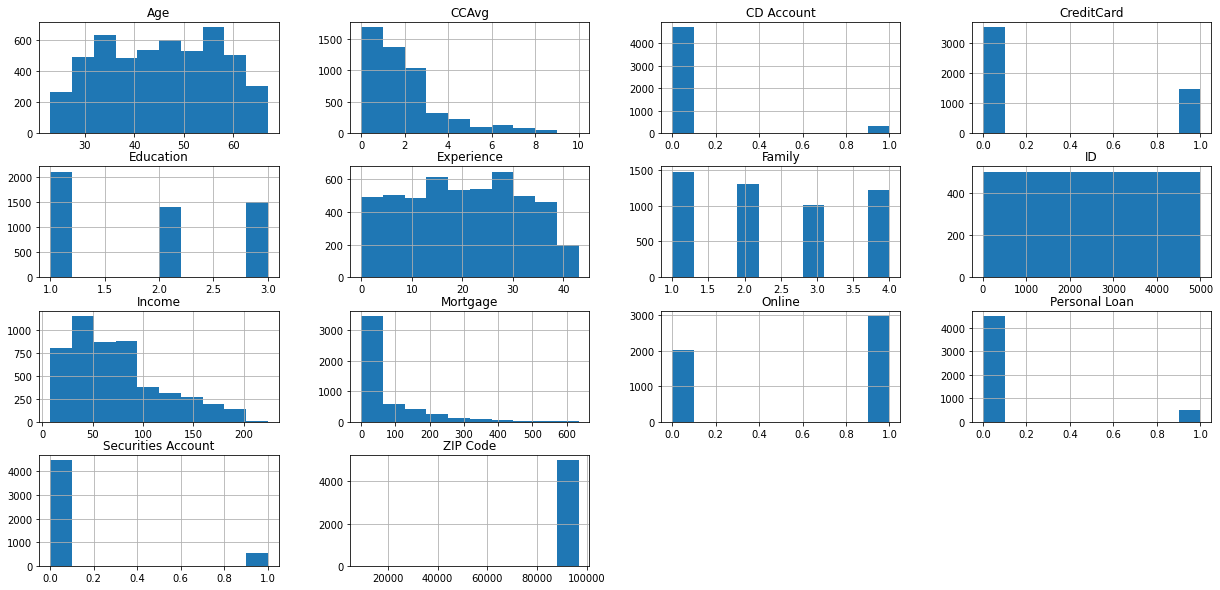

In [43]:
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")].index.values].hist(figsize=[21,10])
plt.show()


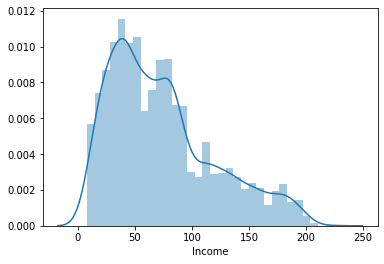

In [44]:
sns.distplot(df.Income)

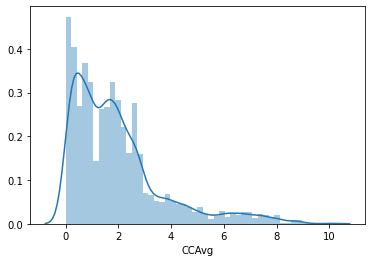

In [45]:
sns.distplot(df.CCAvg)

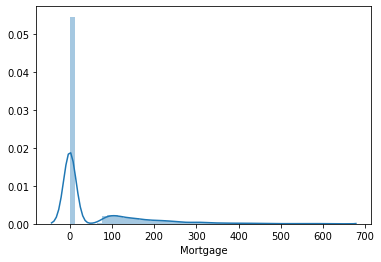

In [46]:
sns.distplot(df.Mortgage)

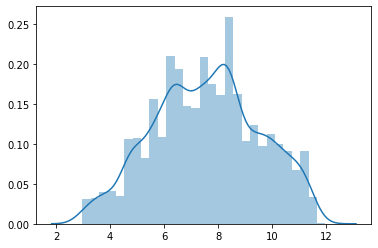

In [47]:
from sklearn.preprocessing import PowerTransformer as pt

pwrt = pt(method="yeo-johnson" , standardize=False)

pwrt.fit(df_x["Income"].values.reshape(-1,1))
temp = pwrt.transform(df_x["Income"].values.reshape(-1,1))
sns.distplot(temp)
plt.show()

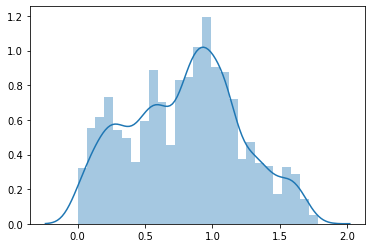

In [48]:
from sklearn.preprocessing import PowerTransformer as pt

pwrt = pt(method="yeo-johnson" , standardize=False)

pwrt.fit(df_x["CCAvg"].values.reshape(-1,1))
temp = pwrt.transform(df_x["CCAvg"].values.reshape(-1,1))
sns.distplot(temp)

**6_ Use the Logistic Regression model to predict the likelihood of a customer buying personal loans**

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [50]:
target = 'Personal Loan'
df_x = df.drop(target,axis='columns',inplace=False)
df_y = df[target]

x_train,x_test,y_train,y_test = train_test_split(df_x, df_y,test_size=0.30,random_state=100,stratify=df_y)

In [55]:
df.isnull().sum().sort_values()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [56]:
df=df.dropna(subset=['Experience'])

In [57]:

Log_R = LogisticRegression(max_iter=1000)
Log_R.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred = Log_R.predict(x_test)
print("Accuracy :",accuracy_score(y_test,y_pred)*100)

Accuracy : 90.14745308310992


**7. Print all the metrics related for evaluating the model performance**

In [59]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)
print(classification_report(y_test, y_pred))


[[1298   50]
 [  97   47]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1348
           1       0.48      0.33      0.39       144

    accuracy                           0.90      1492
   macro avg       0.71      0.64      0.67      1492
weighted avg       0.89      0.90      0.89      1492



In [60]:
pred_test_x = Log_R.predict(x_test)
pred_train_x = Log_R.predict(x_train)

from sklearn.metrics import recall_score,precision_score,f1_score,roc_auc_score

print("Recall : ",recall_score(y_test , pred_test_x))
print("Precision : ", precision_score(y_test , pred_test_x))
print("F1 Score : ", f1_score(y_test , pred_test_x))
print("Roc Auc Score : ", roc_auc_score(y_test , pred_test_x))

Recall :  0.3263888888888889
Precision :  0.4845360824742268
F1 Score :  0.3900414937759336
Roc Auc Score :  0.6446484503791625


**8. Compares many various other classification algorithms**

In [61]:
#AFTER APPLYING STANDARDIZATION IN LOGISTIC REGRESSION

from sklearn import preprocessing
from sklearn.metrics import recall_score,precision_score,f1_score,roc_auc_score,accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve,auc

col_names = df.columns
scaler=preprocessing.StandardScaler()
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.fit_transform(x_test)
L_R = LogisticRegression()
L_R.fit(scaled_x_train,y_train)

y_pred1 = L_R.predict(scaled_x_test)
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

pred_1_test_x = L_R.predict(scaled_x_test)
pred_1_train_x = L_R.predict(scaled_x_train)
print("Recall : ",recall_score(y_test , pred_1_test_x))
print("Precision : ", precision_score(y_test , pred_1_test_x))
print("F1 Score : ", f1_score(y_test , pred_1_test_x))
print("Roc Auc Score : ", roc_auc_score(y_test , pred_1_test_x))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1348
           1       0.79      0.59      0.68       144

    accuracy                           0.95      1492
   macro avg       0.88      0.79      0.82      1492
weighted avg       0.94      0.95      0.94      1492

0.9457104557640751
[[1326   22]
 [  59   85]]
Recall :  0.5902777777777778
Precision :  0.794392523364486
F1 Score :  0.6772908366533864
Roc Auc Score :  0.7869786515001649


In [62]:
#K-Nearest Neighbor
from sklearn.metrics import roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
knn_Model=KNeighborsClassifier(n_neighbors=3)
knn_Model.fit(scaled_x_train,y_train)

y_pred=knn_Model.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

pred_1_test_x = knn_Model.predict(scaled_x_test)
pred_1_train_x = knn_Model.predict(scaled_x_train)
print("Recall : ",recall_score(y_test , pred_1_test_x))
print("Precision : ", precision_score(y_test , pred_1_test_x))
print("F1 Score : ", f1_score(y_test , pred_1_test_x))
print("Roc Auc Score : ", roc_auc_score(y_test , pred_1_test_x))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1348
           1       0.88      0.58      0.70       144

    accuracy                           0.95      1492
   macro avg       0.92      0.78      0.84      1492
weighted avg       0.95      0.95      0.95      1492

0.9517426273458445
[[1337   11]
 [  61   83]]
Recall :  0.5763888888888888
Precision :  0.8829787234042553
F1 Score :  0.6974789915966386
Roc Auc Score :  0.7841143257500824


In [63]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
d_t=DecisionTreeClassifier(criterion='entropy' , random_state=1)
d_t.fit(scaled_x_train,y_train)
y_pred=d_t.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


pred_1_test_x = d_t.predict(scaled_x_test)
pred_1_train_x = d_t.predict(scaled_x_train)
print("Recall : ",recall_score(y_test , pred_1_test_x))
print("Precision : ", precision_score(y_test , pred_1_test_x))
print("F1 Score : ", f1_score(y_test , pred_1_test_x))
print("Roc Auc Score : ", roc_auc_score(y_test , pred_1_test_x))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1348
           1       0.92      0.90      0.91       144

    accuracy                           0.98      1492
   macro avg       0.96      0.95      0.95      1492
weighted avg       0.98      0.98      0.98      1492

0.9832439678284183
[[1337   11]
 [  14  130]]
Recall :  0.9027777777777778
Precision :  0.9219858156028369
F1 Score :  0.912280701754386
Roc Auc Score :  0.9473087701945269


In [64]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
r_f=RandomForestClassifier(criterion='entropy',n_estimators=150,max_features=6,random_state=14)
r_f.fit(scaled_x_train,y_train)
y_pred=r_f.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

pred_1_test_x = r_f.predict(scaled_x_test)
pred_1_train_x = r_f.predict(scaled_x_train)
print("Recall : ",recall_score(y_test , pred_1_test_x))
print("Precision : ", precision_score(y_test , pred_1_test_x))
print("F1 Score : ", f1_score(y_test , pred_1_test_x))
print("Roc Auc Score : ", roc_auc_score(y_test , pred_1_test_x))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1348
           1       0.98      0.90      0.94       144

    accuracy                           0.99      1492
   macro avg       0.99      0.95      0.97      1492
weighted avg       0.99      0.99      0.99      1492

0.9892761394101877
[[1346    2]
 [  14  130]]
Recall :  0.9027777777777778
Precision :  0.9848484848484849
F1 Score :  0.9420289855072465
Roc Auc Score :  0.9506470491262775


**9. Business understanding of the model**

LR: 0.913297 (0.011714)
DT: 0.979688 (0.010639)
RF: 0.986321 (0.003576)


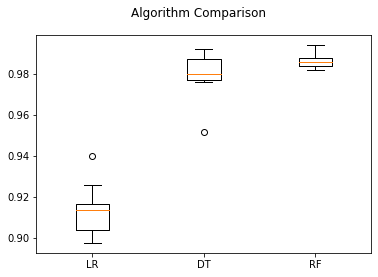

In [65]:
from sklearn import model_selection

models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, df_x, df_y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Conclusion**

The classification goal is to predict the likelihood of a liability customer buying personal loans.They want to set up a new marketing campaign; hence, they need information about the relation between the variables given in the data. So from three classification algorithms were used in this study. From the above plot , it seems like **Random Forest algorithm** have the highest accuracy and we can choose that as our final model.